In [59]:
import autograd.numpy as np
from autograd import grad, elementwise_grad, jacobian
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import datasets
import time


def feedforward(x, P, act_func):
    dim = len(P)
    z = np.array(x)
    
    for i in range(dim):
        z = np.concatenate((z, np.ones((z.shape[0], 1))), axis=1)
        z = act_func[i](z @ P[i])

    return z


def generate_P(dim):
    n = len(dim) - 1
    P = n * [None]
    for i in range(n):
        P[i] = np.random.normal(0, 1, (dim[i] + 1, dim[i + 1]))

    return P

In [74]:
A = np.array([[1., 7., 3.], [7., 4., -5.], [3., -5., 6.]])
x0 = np.array([1, 0, 0])#np.random.normal(0, 1, 3)

print(np.linalg.eig(A))

def g_trial(t, P, act_func):
    return np.exp(-t)*x0 +  (1 - np.exp(-t))*feedforward(t, P, act_func)


g_trial_t = jacobian(g_trial)


def f(A, x):
    x = x[:, np.newaxis]
    return (x.T@x)*A@x - (x.T@A@x)*x 

    

def cost(t, P, act_func):
    x = g_trial(t, P, act_func)
    
    LHS = g_trial_t(t, P, act_func)
    LHS = np.array([LHS[i,:,i].flatten() for i in range(len(t))])
    #print(x)
    RHS = np.array([f(A,i) for i in x])
    
    #print(RHS[:,:,0])
    #print(LHS)
    
    return np.mean((LHS - RHS[:,:,0])**2)
    

grad = elementwise_grad(cost,1)

(array([-7.00792852,  7.03594585, 10.97198268]), array([[ 0.68415383, -0.62878419, -0.36954564],
       [-0.61391034, -0.22292725, -0.75724338],
       [-0.39376087, -0.74493885,  0.53853365]]))


In [98]:
np.random.seed(42)
#%matplotlib notebook

t = np.expand_dims(np.linspace(0, 1, 100), axis = -1)



P = generate_P((1, 100, 50, 3))
act_func = [np.tanh, np.tanh, lambda x: x]

N = 1000

for i in range(N):
    if i % (N / 100) == 0:
        print(i / (N / 100))
        print(cost(t, P, act_func))
        print("-------------")
   
    gradient = grad(t, P, act_func)

    P[0] -= 0.0000001 * gradient[0]
    P[1] -= 0.0000001 * gradient[1]
    P[2] -= 0.0000001 * gradient[2]


0.0
63117.692545210346
-------------
1.0
2612.2118014783173
-------------


KeyboardInterrupt: 

[[ 1.          0.          0.        ]
 [ 0.93962871 -0.06125233 -0.33666903]
 [ 0.80427691 -0.04090079 -0.59284549]
 [ 0.64429676 -0.00741172 -0.76473966]
 [ 0.47696061  0.01094491 -0.87885652]
 [ 0.32317895  0.04359339 -0.94533326]
 [ 0.1974243   0.17188503 -0.96513169]
 [ 0.07126242  0.48502996 -0.87158913]
 [-0.13277699  0.86433723 -0.48506848]
 [-0.3791834   0.9089501   0.17329069]
 [-0.45603112  0.71434295  0.53080106]
 [-0.41082806  0.63350179  0.65566439]
 [-0.25829054  0.57801489  0.77407027]
 [-0.02490655  0.44444888  0.89545791]
 [ 0.17975449  0.31616215  0.93152017]
 [ 0.3343286   0.32366739  0.88513491]
 [ 0.46809282  0.44529197  0.76328512]
 [ 0.59894426  0.62237422  0.50390089]
 [ 0.65752157  0.74928919  0.07893729]
 [ 0.61313096  0.76790138 -0.18546668]]


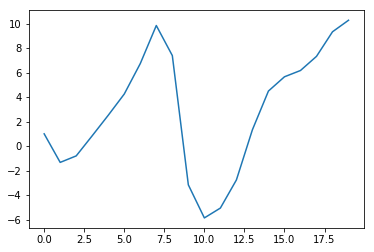

In [97]:
v = g_trial(t, P, act_func)
v = v/np.sqrt(np.einsum("ij,ij->i", v, v)[:,np.newaxis])

print(v)
eig = np.einsum("ij,ij->i", v@A, v)
#print(eig)
plt.plot(eig)
plt.show()


In [42]:
"""
for i in range(N):
    if i % (N / 100) == 0:
        print(i / (N / 100))
        print(cost(t, P, act_func))
        print("-------------")
   
    gradient = grad(t, P, act_func)

    P[0] -= 0.000001 * gradient[0]
    P[1] -= 0.000001 * gradient[1]
    P[2] -= 0.000001 * gradient[2]

print(cost(t, P, act_func))

v = g_trial(np.array([[10]]), P, act_func)
print(v.shape)
print(v@A@v.T/(v@v.T))
"""
"""
for i in range(N):
    if i % (N / 100) == 0:
        print(i / (N / 100))
        print(cost(t, P, act_func))
        print("-------------")
   
    gradient = grad(t, P, act_func)

    P[0] -= 0.0001 * gradient[0]
    P[1] -= 0.0001 * gradient[1]

print(cost(x, P, act_func))
"""


"""
a = 0

g1 = g2 = g3

fig, ax = plt.subplots()
plot, = ax.plot(x, 10*np.exp(-2*x))
ax.plot(x, 10*np.exp(-2*x))

texts = [fig.text(0.5, 0.5 - i * 0.05, '') for i in range(3)]

for i in range(N):
    if i % (N / 100) == 0:
        print(i / (N / 100))
        print(cost(x, P, act_func))
        print("-------------")
    plot.set_ydata(g_trial(x, P, act_func))
   

    gradient = grad(x, P, act_func)
    g1 = gradient[0] + a * g1
    g2 = gradient[1] + a * g2
    g3 = gradient[2] + a * g3
    
    values = [f"{np.mean(np.abs(g1))}", f"{np.mean(np.abs(g2))}", f"{np.mean(np.abs(g3))}"]    
    [txt.set_text(str(val)) for txt, val in zip(texts, values)]
    fig.canvas.draw()

    P[0] -= 0.0001 * g1
    P[1] -= 0.0001 * g2
    P[2] -= 0.0001 * g3

print(cost(x, P, act_func))
"""
def func(t):
    return np.array([np.sin(t), np.cos(t)])

dfunc = jacobian(func, 0)

t = np.array([0.2, 0.3])
print(dfunc(t))

[[[ 0.98006658  0.        ]
  [ 0.          0.95533649]]

 [[-0.19866933  0.        ]
  [ 0.         -0.29552021]]]
